In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from neuralprophet import NeuralProphet
import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

In [2]:
m = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality='auto',
    learning_rate=1.0
)

df = pd.read_csv('../forecasting/historical_data/fs_res_daily.csv', parse_dates=['ds'])
# df.loc[(df['ds'] > '2020-03-15') & (df['ds'] < '2020-07-01'), 'y'] = None
# create a test holdout set:
df_train_val, df_test = m.split_df(df=df, freq="D", valid_p=0.2)
# create a validation holdout set:
df_train, df_val = m.split_df(df=df_train_val, freq="D", valid_p=0.2)

In [3]:
# fit a model on training data and evaluate on validation set.
metrics_train1 = m.fit(df=df_train, freq="D")
metrics_val = m.test(df=df_val)


In [4]:
# refit model on training and validation data and evaluate on test set.
m = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    learning_rate=1.0
)
metrics_train2 = m.fit(df=df_train_val, freq="D")
metrics_test = m.test(df=df_test)

In [5]:
metrics_train1["split"]  = "train1"
metrics_train2["split"]  = "train2"
metrics_val["split"] = "validate"
metrics_test["split"] = "test"
metrics_train1.tail(1).append([metrics_train2.tail(1), metrics_val, metrics_test]).drop(columns=['RegLoss'])

,SmoothL1Loss,MAE,RMSE,split
196,0.010526,204.343355,313.012060,train1
182,0.010999,221.167583,345.430986,train2
0,0.018960,301.261139,459.760254,validate
0,0.012413,275.758606,387.130707,test


In [6]:
METRICS = ['SmoothL1Loss', 'MAE', 'RMSE']
params = {'n_forecasts': 45,'n_lags': 90, 'n_changepoints': 10, 'yearly_seasonality': True, 'weekly_seasonality': True, 
 'daily_seasonality': 'auto', 'learning_rate': 1.0}

In [7]:

# params = {"seasonality_mode": "additive", "learning_rate": 1.0}

df = pd.read_csv('../forecasting/historical_data/fs_res_daily.csv', parse_dates=['ds'])
folds = NeuralProphet(**params).crossvalidation_split_df(df, freq="D", k=5, fold_pct=0.20, fold_overlap_pct=0.5)

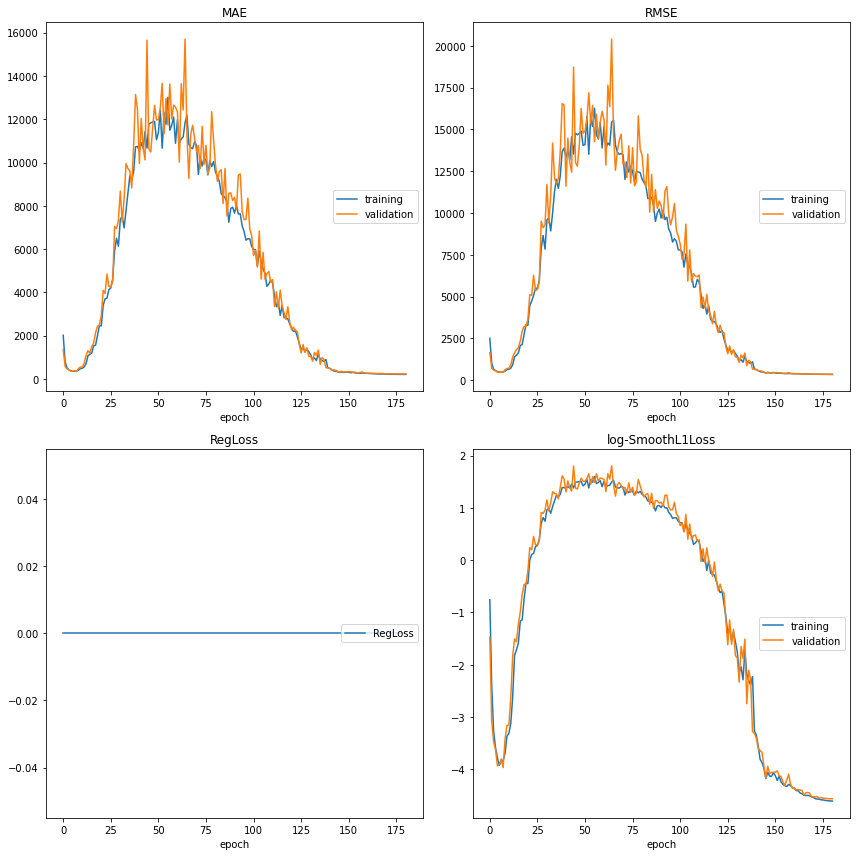

MAE
	training         	 (min:  208.821, max: 13016.641, cur:  208.821)
	validation       	 (min:  229.531, max: 15700.346, cur:  229.531)
RMSE
	training         	 (min:  337.839, max: 16262.613, cur:  337.839)
	validation       	 (min:  346.110, max: 20398.318, cur:  346.110)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
log-SmoothL1Loss
	training         	 (min:   -4.604, max:    1.601, cur:   -4.604)
	validation       	 (min:   -4.561, max:    1.805, cur:   -4.561)


In [8]:
metrics_train = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS)

for df_train, df_test in folds:
    m = NeuralProphet(**params)
    train = m.fit(df=df_train, freq="D",validation_df=df_test,progress='plot-all')
    test = m.test(df=df_test)
    metrics_train = metrics_train.append(train[METRICS].iloc[-1])
    metrics_test = metrics_test.append(test[METRICS].iloc[-1])

In [9]:
metrics_test.describe()

,SmoothL1Loss,MAE,RMSE
count,5.000000,5.000000,5.000000
unique,5.000000,5.000000,5.000000
top,0.063282,655.872986,760.847412
freq,1.000000,1.000000,1.000000


In [10]:
metrics_val.describe()

,SmoothL1Loss,MAE,RMSE
count,1.00000,1.000000,1.000000
mean,0.01896,301.261139,459.760254
std,NaN,NaN,NaN
min,0.01896,301.261139,459.760254
25%,0.01896,301.261139,459.760254
50%,0.01896,301.261139,459.760254
75%,0.01896,301.261139,459.760254
max,0.01896,301.261139,459.760254


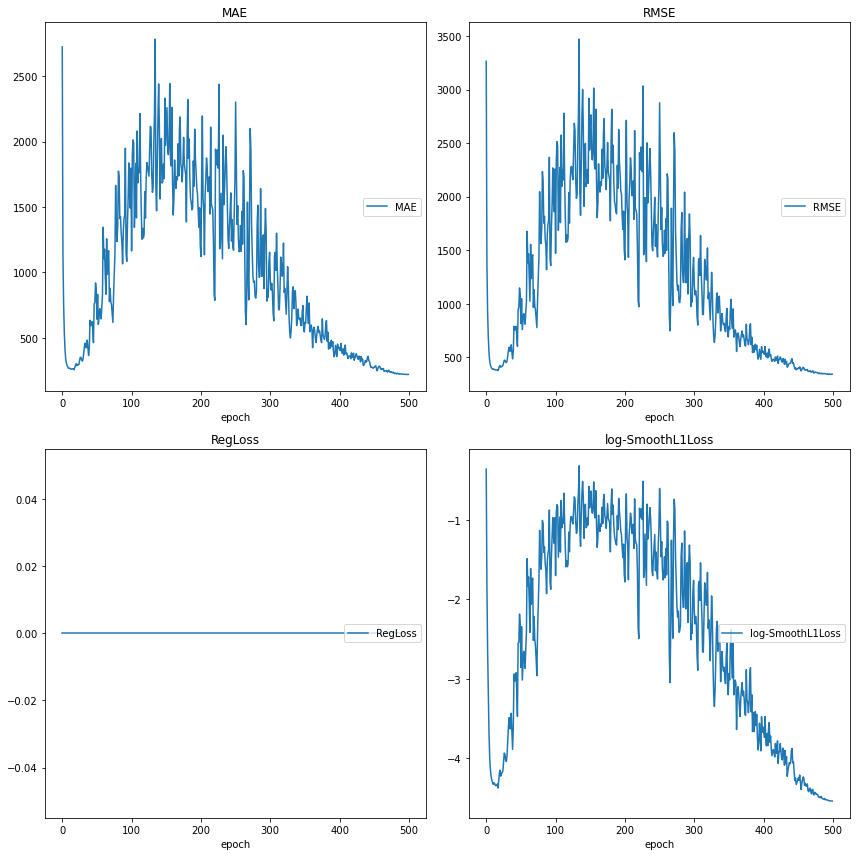

MAE
	MAE              	 (min:  219.978, max: 2783.138, cur:  219.978)
RMSE
	RMSE             	 (min:  339.792, max: 3470.240, cur:  341.909)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
log-SmoothL1Loss
	log-SmoothL1Loss 	 (min:   -4.539, max:   -0.317, cur:   -4.539)


In [47]:
m = NeuralProphet(
    n_forecasts=3,
#     n_lags=90,
    n_changepoints=10,
    changepoints_range=0.7,
    yearly_seasonality=True,
    weekly_seasonality=True,
#     daily_seasonality='auto',
    num_hidden_layers=25,
    epochs=500,
    learning_rate=1.0,
    newer_samples_weight = 1.3
)
# m = m.add_country_holidays("US")
metrics = m.fit(df,progress='plot-all')

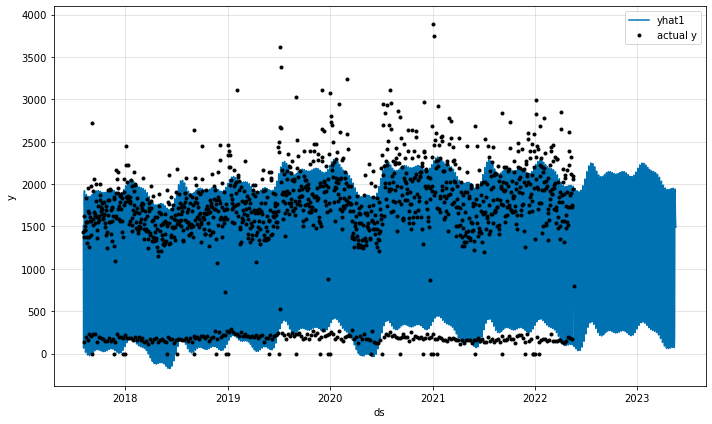

In [46]:
future = m.make_future_dataframe(df,periods=365,n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)


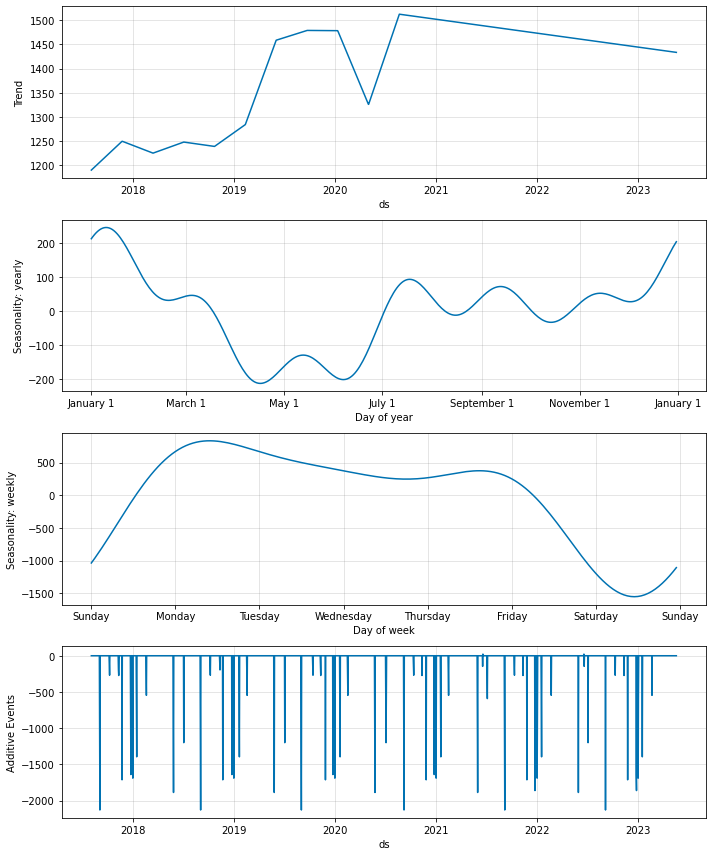

In [40]:
fig_comp = m.plot_components(forecast)


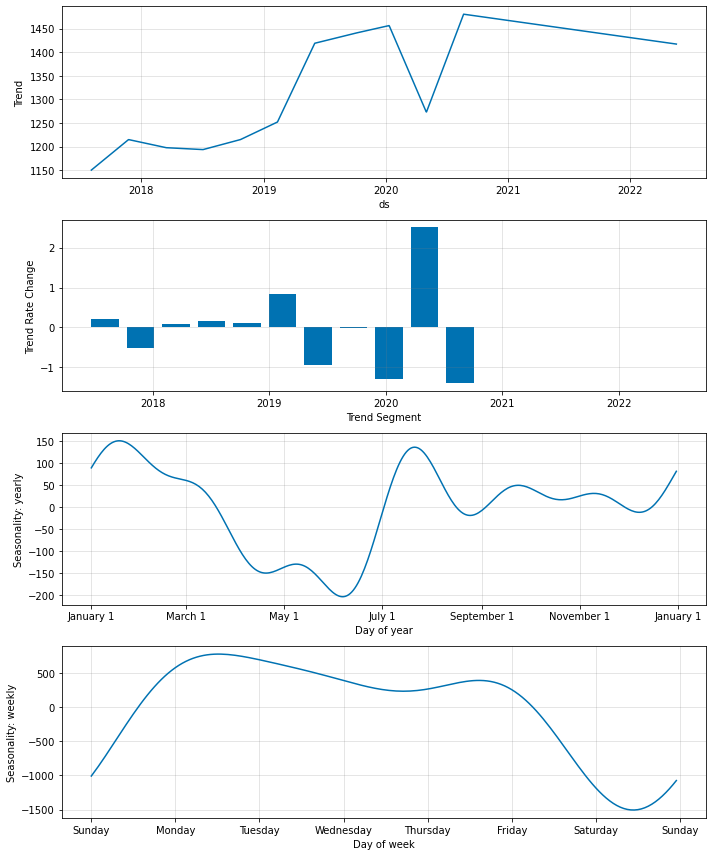

In [37]:
fig_param = m.plot_parameters()

In [ ]:
forecast.tail()

In [ ]:
future.tail()

In [ ]:
df.tail()